In [1]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

from termcolor import colored

In [2]:
class SARSA:
    
    def update(self, curr_state, curr_action, reward, next_state, next_action, Q, alpha, gamma):

        error = reward + (gamma*Q[next_action][next_state[0],next_state[1]]) - Q[curr_action][curr_state[0],curr_state[1]]
        Q[curr_action][curr_state[0],curr_state[1]] = Q[curr_action][curr_state[0],curr_state[1]] + alpha*error
        
        return Q
    
    
    def select_action(self,epsilon, state, Q, env):
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
        else:
            action = np.argmax(Q[:,state[0],state[1]])
        return action
    
    
    def sarsa(self, gamma, alpha, epsilon, episodes, env):
        
        Q = np.random.rand(env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1])
    
        goal_pos = env.set_goal('A')
#         Q[:,goal_pos[0],goal_pos[1]] = 10
#         print(np.amax(Q))


        Terminal_state = goal_pos

        steps = np.zeros([episodes])
        avg_reward = np.zeros([episodes])

        p=0
        stp = 0
        rew = 0
        
        for episode in range(episodes):

            curr_state = env.reset()
#             curr_state = env.get_state()


            curr_action = self.select_action(epsilon, curr_state, Q, env)
#             curr_action = env.actual_action(sel_action)

            while True:

                next_state, reward = env.step(curr_state, curr_action)
                
                next_action = self.select_action(epsilon, next_state, Q, env)
#                 next_action = env.actual_action(sel_next_action)

#                 print('reward == ', reward,"curr_state==", curr_state, "next_state==", next_state, "action==",curr_action)
                
                Q = self.update(curr_state, curr_action, reward, next_state, next_action, Q, alpha, gamma)
                
        #steps[epis]
                
                
                curr_state = next_state
                curr_action = next_action
                
                steps[episode]+=1
                avg_reward[episode] += reward


                if curr_state == goal_pos:
#                     if episode%50==0:
#                         print(p)
#                         steps[p] = stp/50
#                         avg_reward[p] = rew/50
#                         p+=1
#                         stp=0
#                         rew=0

                    print("Steps =======================", steps[episode])
                    print("reward=======================", avg_reward[episode])
                    break

        return avg_reward, steps, Q

In [13]:

def plot_sarsa(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()

In [14]:
# To display the policy learn't
def plot_policy(goal_pos, Q):
    plt.rcParams['figure.figsize'] = [7,7]
    fig, ax = plt.subplots()

    ax.matshow(np.argmax(Q, axis=0))
    for i in range(12):
        for j in range(12):
            if [j,i] == goal_pos:
                ax.text(i,j,'$', va='center', ha='center')
            else:
                c = int(np.argmax(Q, axis=0)[j,i])
                direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
                ax.text(i, j, direcs[c], va='center', ha='center')
# plot_policy([0,11],Q)

Steps ======================= 1250.0
Steps ======================= 119.0
Steps ======================= 206.0
Steps ======================= 262.0
Steps ======================= 155.0
Steps ======================= 27.0
Steps ======================= 33.0
Steps ======================= 180.0
Steps ======================= 468.0
Steps ======================= 151.0
Steps ======================= 24.0
Steps ======================= 78.0
Steps ======================= 35.0
Steps ======================= 90.0
Steps ======================= 52.0
Steps ======================= 329.0
Steps ======================= 81.0
Steps ======================= 85.0
Steps ======================= 26.0
Steps ======================= 27.0
Steps ======================= 29.0
Steps ======================= 127.0
Steps ======================= 18.0
Steps ======================= 152.0
Steps ======================= 65.0
Steps ======================= 41.0
Steps ======================= 65.0
Steps ======================= 63.0
Steps ==

Steps ======================= 25.0
Steps ======================= 47.0
Steps ======================= 44.0
Steps ======================= 55.0
Steps ======================= 42.0
Steps ======================= 33.0
Steps ======================= 45.0
Steps ======================= 39.0
Steps ======================= 42.0
Steps ======================= 39.0
Steps ======================= 68.0
Steps ======================= 25.0
Steps ======================= 40.0
Steps ======================= 95.0
Steps ======================= 19.0
Steps ======================= 75.0
Steps ======================= 47.0
Steps ======================= 41.0
Steps ======================= 32.0
Steps ======================= 37.0
Steps ======================= 40.0
Steps ======================= 44.0
Steps ======================= 51.0
Steps ======================= 46.0
Steps ======================= 36.0
Steps ======================= 49.0
Steps ======================= 48.0
Steps ======================= 49.0
Steps ==============

Steps ======================= 35.0
Steps ======================= 56.0
Steps ======================= 36.0
Steps ======================= 17.0
Steps ======================= 15.0
Steps ======================= 42.0
Steps ======================= 31.0
Steps ======================= 49.0
Steps ======================= 22.0
Steps ======================= 44.0
Steps ======================= 33.0
Steps ======================= 35.0
Steps ======================= 40.0
Steps ======================= 29.0
Steps ======================= 22.0
Steps ======================= 24.0
Steps ======================= 27.0
Steps ======================= 21.0
Steps ======================= 35.0
Steps ======================= 54.0
Steps ======================= 29.0
Steps ======================= 28.0
Steps ======================= 29.0
Steps ======================= 46.0
Steps ======================= 23.0
Steps ======================= 30.0
Steps ======================= 60.0
Steps ======================= 22.0
Steps ==============

Steps ======================= 49.0
Steps ======================= 50.0
Steps ======================= 29.0
Steps ======================= 30.0
Steps ======================= 39.0
Steps ======================= 38.0
Steps ======================= 33.0
Steps ======================= 36.0
Steps ======================= 24.0
Steps ======================= 22.0
Steps ======================= 51.0
Steps ======================= 22.0
Steps ======================= 32.0
Steps ======================= 21.0
Steps ======================= 37.0
Steps ======================= 36.0
Steps ======================= 29.0
Steps ======================= 49.0
Steps ======================= 33.0
Steps ======================= 24.0
Steps ======================= 14.0
Steps ======================= 28.0
Steps ======================= 17.0
Steps ======================= 33.0
Steps ======================= 35.0
Steps ======================= 20.0
Steps ======================= 13.0
Steps ======================= 36.0
Steps ==============

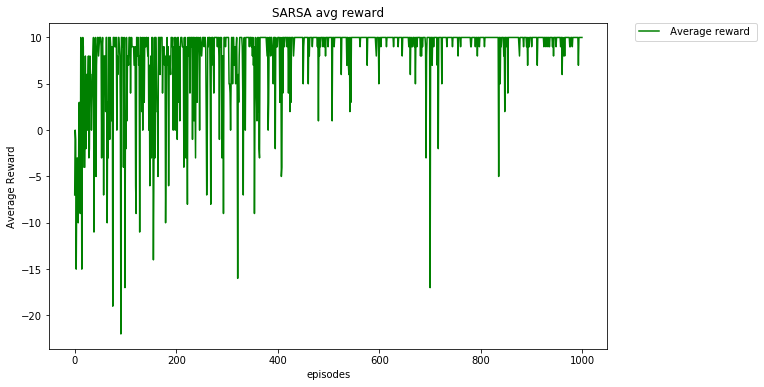

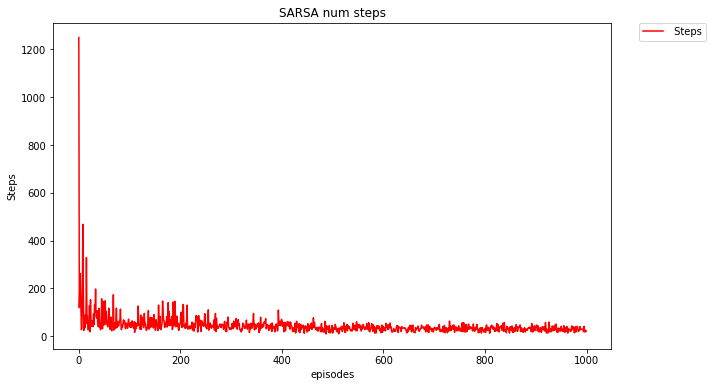

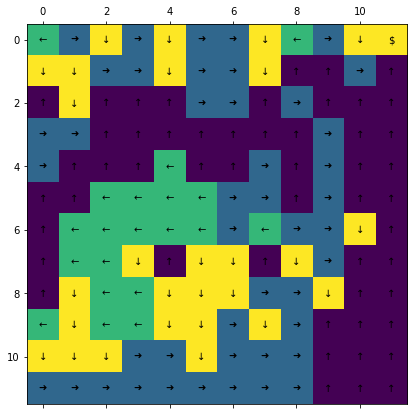

In [15]:
def main():    # parameters
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 1000
        
    env = gym.make('gym_pdw:pdw-v0')
    sr = SARSA()
    avg_reward, steps, Q = sr.sarsa(gamma, alpha, epsilon, episodes, env)
    plot_sarsa(avg_reward, steps, episodes)
    plot_policy([0,11],Q)    

main()

In [6]:
plot_policy([0,11],Q)

NameError: name 'Q' is not defined

In [ ]:
from multiprocessing import Pool

if __name__ == '__main__':
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 100
        
    env = gym.make('gym_pdw:pdw-v0')
    sr = SARSA()
    p = Pool(processes = 50)
#     Rews, Stps ,Q_vals = p.map(sr.sarsa(gamma, alpha, epsilon, episodes, env),range(1000)) 
    Data = p.map(sr.sarsa(gamma, alpha, epsilon, episodes, env),range(1)) 
    p.close()

In [ ]:
print(env.grid)
print(env.goal_positions)
print(env.actions)
print(env.get_start_positions())


In [ ]:
np.argmax(Q, axis=0)


In [ ]:
Q.shape

In [ ]:
class SARSA:
    
    # Q function update 
    def update(self, curr_state, curr_action, reward, next_state, next_action, Q, alpha):

        error = reward + (gamma*Q[next_action][next_state[0],next_state[1]]) - Q[curr_action][curr_state[0],curr_state[1]]
        #     print(error, reward)
        Q[curr_action][curr_state[0],curr_state[1]] = Q[curr_action][curr_state[0],curr_state[1]] + alpha*error
    #     print(np.argmax(Q, axis = 0))
    #     if state == [1,11] and action==0:
    #         print("error =  ", error, "Q = ", Q[action][state[0],state[1]], "reward = ", reward,"cur_state=",state,"next_state = ",next_state,"action =", action)
        return Q
    
    
    # Epsilon-greedy action selection
    def select_action(self,epsilon, state, Q):
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
#             print("rand", state,  action)
        else:
            action = np.argmax(Q[:,state[0],state[1]])
#             print("greedy",state,action)
        return action
    
    
    def sarsa(self, gamma, alpha, epsilon, episodes):
        
        # Initializing Q function values to zero
        Q = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])
    
        # Set the goal variant
        goal_pos = env.set_goal('A')
        Q[:,goal_pos[0],goal_pos[1]] = 10


        # Setting terminal action-state value 
        Terminal_state = goal_pos

        # Number of steps required to reach goal
        steps = np.zeros([episodes//50])
        avg_reward = np.zeros([episodes//50])

        p=0
        stp = 0
        rew = 0
        
        for episode in range(episodes):

            env.reset()
            curr_state = env.get_state()
#             print(curr_state)
            
            if episode%10==0:
                plot_policy(goal_pos,Q)

            
                
            cur_stp = 0
            cur_rew = 0
            
            
            while True:

                selected_action = self.select_action(epsilon, curr_state, Q)
                next_state, reward, curr_action = env.step(curr_state, selected_action)
                
                #                 print(next_state, curr_state,"======")
                print('reward == ', reward,"curr_state==", curr_state, "next_state==", next_state, "action==",curr_action)

                selected_next_action = self.select_action(epsilon, next_state, Q)
                next_action = env.actual_action(selected_next_action)

                Q = self.update(curr_state, curr_action, reward, next_state, next_action, Q, alpha)
    #             print("Q of current state is =", Q[:,curr_state[0],curr_state[1]])
#                 if curr_state==[1,11] and action == 0:
#                     print(curr_state, next_state)
#                     print(action, "------------",Q[action][1,11], "*************************************")
                stp+=1
                rew+=reward
                cur_stp+=1
                cur_rew+=reward
                
                
                curr_state = next_state
#                 st = env.get_start_positions()
    #             print(curr_state, "curr_state")

                if curr_state == goal_pos:
                    if episode%50==0:
                        print(p)
                        steps[p] = stp/50
                        avg_reward[p] = rew/50
                        p+=1
                        stp=0
                        rew=0
#                     print(avg_reward[episode])
                    print("Steps =======================", cur_stp)
                    print("reward=======================", cur_rew)
                    break

        return avg_reward, steps, Q

0 : [-1,0], # North
1 : [0,1], # East
2 : [0,-1], # West
3 : [1,0] # South 

In [ ]:
Q

In [ ]:
# Q = np.zeros((env.observation_space, env.action_space))
env.action_space.n

In [ ]:
env = gym.make('FrozenLake-v0')

In [ ]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [ ]:
Q

In [ ]:
from collections import defaultdict
q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
q_table[tuple([10,10]),4]

In [ ]:
q = np.zeros([tuple([12,12]),0]) 

In [ ]:
q = np.zeros([12,12,4])
q[11,11][2]

In [ ]:
q[2,11,11]
s = np.array([11,11])
print(s.shape)
s = np.squeeze(s,1)
print(s.shape)


In [ ]:
Q = np.ones([4,12,12])
Q[1,11,11] = 5
Q[2,5,5] = 4
np.argmax(Q,axis=0)